In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('wine.csv')
print(wine)

     Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
5              1    14.20        1.76  2.45               15.2        112   
6              1    14.39        1.87  2.45               14.6         96   
7              1    14.06        2.15  2.61               17.6        121   
8              1    14.83        1.64  2.17               14.0         97   
9              1    13.86        1.35  2.27               16.0         98   
10             1    14.10        2.16  2.30               18.0        105   
11             1    14.12        1.48  2.32               16.8         95   

In [3]:
df_wine = wine[wine['Class label'] != 1]
print(df_wine)

     Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
59             2    12.37        0.94  1.36               10.6         88   
60             2    12.33        1.10  2.28               16.0        101   
61             2    12.64        1.36  2.02               16.8        100   
62             2    13.67        1.25  1.92               18.0         94   
63             2    12.37        1.13  2.16               19.0         87   
64             2    12.17        1.45  2.53               19.0        104   
65             2    12.37        1.21  2.56               18.1         98   
66             2    13.11        1.01  1.70               15.0         78   
67             2    12.37        1.17  1.92               19.6         78   
68             2    13.34        0.94  2.36               17.0        110   
69             2    12.21        1.19  1.75               16.8        151   
70             2    12.29        1.61  2.21               20.4        103   

In [4]:
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Ash']].values

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [6]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print('X_train \n', X_train)
print('y_train \n', y_train)

X_train 
 [[ 12.     2.42]
 [ 12.2    2.32]
 [ 12.29   1.98]
 [ 12.33   1.95]
 [ 14.13   2.74]
 [ 12.16   2.31]
 [ 12.47   2.2 ]
 [ 13.4    2.86]
 [ 12.37   2.1 ]
 [ 13.11   2.75]
 [ 12.87   2.48]
 [ 14.34   2.7 ]
 [ 12.29   2.21]
 [ 12.08   2.5 ]
 [ 11.87   2.39]
 [ 13.5    2.62]
 [ 12.08   2.51]
 [ 12.29   2.22]
 [ 12.25   2.54]
 [ 12.96   2.35]
 [ 12.37   2.16]
 [ 12.93   2.7 ]
 [ 11.96   2.3 ]
 [ 13.48   2.64]
 [ 12.08   1.7 ]
 [ 11.46   1.82]
 [ 12.51   1.98]
 [ 13.58   2.69]
 [ 12.52   2.17]
 [ 12.67   2.24]
 [ 12.34   2.46]
 [ 13.05   2.32]
 [ 12.81   2.4 ]
 [ 13.52   2.72]
 [ 12.22   1.94]
 [ 12.     2.  ]
 [ 12.04   2.38]
 [ 13.67   1.92]
 [ 13.73   2.26]
 [ 12.08   2.3 ]
 [ 13.4    2.48]
 [ 12.25   2.12]
 [ 13.32   2.38]
 [ 12.37   1.92]
 [ 12.     2.  ]
 [ 12.37   1.36]
 [ 12.82   2.3 ]
 [ 11.82   1.99]
 [ 12.72   2.2 ]
 [ 11.45   2.42]
 [ 12.42   2.73]
 [ 13.11   1.7 ]
 [ 13.71   2.45]
 [ 13.49   2.24]
 [ 13.16   2.15]
 [ 12.79   2.48]
 [ 13.88   2.23]
 [ 11.79   2.78]
 [ 1

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Decision tree classifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=None)
# Bagging classifier
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, 
                        max_features=1.0, bootstrap=True, 
                        bootstrap_features=False, n_jobs=1, random_state=0)

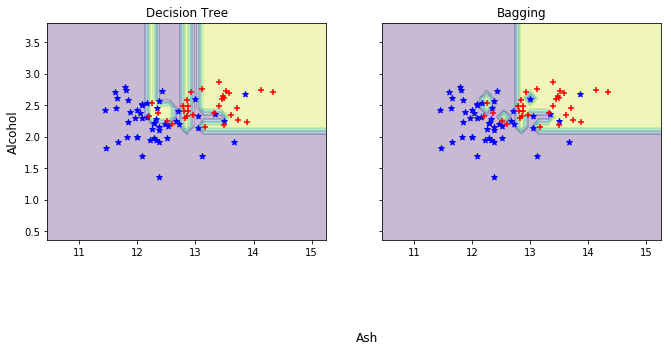

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.15), np.arange(y_min, y_max, 0.15))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(11, 4))
for idx, clf, tt in zip([0, 1], [tree, bag], ['Decision Tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', marker='*')
    axarr[idx].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', marker='+')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2, s='Ash', ha='center', va='center', fontsize=12)
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
y_test_pred_tree = tree.predict(X_test)
tree_test = accuracy_score(y_test, y_test_pred_tree)

bag = bag.fit(X_train, y_train)
y_test_pred_bag = bag.predict(X_test)
bag_test = accuracy_score(y_test, y_test_pred_bag)

print('Decision tree \nAccuracies %.3f' % (tree_test))
print('Bagging \nAccuracies %.3f' % (bag_test))

Decision tree 
Accuracies 0.639
Bagging 
Accuracies 0.722
